# Analisis Prediksi Kanker Paru-Paru Berdasarkan Berbagai Macam Gejala

Kanker paru-paru adalah kanker yang bermula dari permasalahan pada organ paru-paru. Kanker paru-paru merupakan salah satu penyebab utama kematian karena akibat kanker di seluruh dunia. Salah satu penyebab utama kanker paru-paru yaitu merokok, bahkan orang yang tidak merokok namun berada di lingkungan perokok tidak menutup kemungkinan untuk terkena kanker paru-paru. 

Terdapat beberapa penyakit yang dapat diidentifikasi sebagai gejala kanker paru-paru seperti jari yang menguning, kecemasan berlebihan, mudah lelah, batuk-batuk, kesulitan mengunyah, nafas yang pendek, sakit pada dada, dan beberapa penyakit lainnya. 

Untuk itu, kami melakukan analisis ini dengan tujuan untuk membangun sebuah model yang dapat memprediksi terjadinya kanker paru-paru dengan menggunakan algoritma Logistic Regression, Random Forest Classifier, dan Gradient Boosting. Lalu, dari ke-3 algoritma tersebut akan dilihat mana yang memiliki performa terbaik menggunakan Classification Report dan Confusion Matrix

In [1]:
# Mengimport library yang akan dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Mengimport dataset
df_lc = pd.read_csv('survey lung cancer.csv')
df_lc

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


### Sumber Dataset
Data kami dapatkan dari situs web kaggle: https://www.kaggle.com/datasets/nancyalaswad90/lung-cancer

# Data Exploration

In [3]:
df_lc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

Dapat dilihat, semua kolom memiliki jumlah data yang sama sebanyak 309 baris.

In [4]:
df_lc.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

### Penjelasan Kolom
1. GENDER: M(male), F(female) = Jenis Kelamin
2. AGE: Umur Pasien
3. SMOKING**: Apakah pasien merokok atau tidak.*
4. YELLOW_FINGERS**: Apakah pasien mengalami gejala yellow fingers atau tidak
5. ANXIETY**: Apakah pasien mengidap anxiety disorder atau tidak.
6. PEER_PRESSURE**: Apakah pasien mengalami tekanan sosial atau tidak.
7. CHRONIC DISEASE**: Apakah pasien mengidap penyakit kronis atau tidak.
8. FATIGUE**: Apakah pasien merasakan lelah yang akut atau tidak.
9. ALLERGY**: Apakah pasien memiliki alergi atau tidak.
10. WHEEZING**: Apakah pasien mengidap mengi atau tidak.
11. ALCOHOL CONSUMING**: Apakah pasien mengkonsumsi alkohol atau tidak.
12. COUGHING**: Apakah pasien mengalami batuk-batuk atau tidak.
13. SHORTNESS OF BREATH**: Apakah pasien mengalami kesulitan/sesak napas.
14. SWALLOWING DIFFICULTY**: Apakah pasien mengalami kesulitan menelan atau tidak.
15. CHEST PAIN**: Apakah pasien mengalami nyeri dada atau tidak.
16. Lung Cancer: Apakah pasien mengidap kanker paru-paru. (Yes/No)

** 2 = YES, 1 = NO

In [5]:
df_lc.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


# Data Preparation

In [6]:
# Pengecekan nilai null pada data
df_lc.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [7]:
(df_lc == 'unknown')

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
305,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
306,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
307,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
# Merubah typo pada kolom FATIGUE dan ALLERGY
df_lc.rename({'FATIGUE ':'FATIGUE', 'ALLERGY ':'ALLERGY'},axis=1,inplace=True)

In [9]:
# Merubah data 1(NO)/2(YES) menjadi 0(NO)/1(YES)
for column in ['SMOKING','YELLOW_FINGERS','ANXIETY','PEER_PRESSURE','CHRONIC DISEASE','FATIGUE','ALLERGY','WHEEZING','ALCOHOL CONSUMING','COUGHING','SHORTNESS OF BREATH','SWALLOWING DIFFICULTY','CHEST PAIN']:
    df_lc[column].replace([1,2],[0,1],inplace=True)

In [10]:
# Merubah data pada kolom LUNG_CANCER dan GENDER yang masih berupa kata menjadi angka
df_lc['LUNG_CANCER'].replace(['YES','NO'],[1,0],inplace=True)
df_lc['GENDER'].replace(['M','F'],[1,0],inplace=True)

In [11]:
# Merubah tipe data kolom LUNG_CANCER menjadi integer
df_lc['LUNG_CANCER'] = df_lc['LUNG_CANCER'].astype('int64')

In [12]:
# Merubah tipe data kolom GENDER menjadi integer
df_lc['GENDER'] = df_lc['GENDER'].astype('int64')

In [13]:
df_lc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 309 non-null    int64
 1   AGE                    309 non-null    int64
 2   SMOKING                309 non-null    int64
 3   YELLOW_FINGERS         309 non-null    int64
 4   ANXIETY                309 non-null    int64
 5   PEER_PRESSURE          309 non-null    int64
 6   CHRONIC DISEASE        309 non-null    int64
 7   FATIGUE                309 non-null    int64
 8   ALLERGY                309 non-null    int64
 9   WHEEZING               309 non-null    int64
 10  ALCOHOL CONSUMING      309 non-null    int64
 11  COUGHING               309 non-null    int64
 12  SHORTNESS OF BREATH    309 non-null    int64
 13  SWALLOWING DIFFICULTY  309 non-null    int64
 14  CHEST PAIN             309 non-null    int64
 15  LUNG_CANCER            309 non-null    i

# Exploratory Data Analysis

In [14]:
lungcase = df_lc.LUNG_CANCER.value_counts()
lungcase

1    270
0     39
Name: LUNG_CANCER, dtype: int64

### Jumlah Pasien yang mengidap Kanker Paru-paru

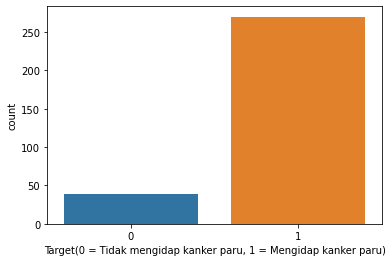

In [50]:
sns.countplot(x='LUNG_CANCER',data=df_lc)
plt.xlabel("Target(0 = Tidak mengidap kanker paru, 1 = Mengidap kanker paru)")
plt.show()

### Persentase Jumlah Pasien yang mengidap Kanker Paru-paru

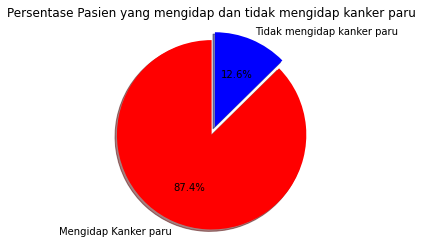

In [49]:
labels="Mengidap Kanker paru","Tidak mengidap kanker paru"
explode=(0.09,0)
colors=["#FF0000","#0000FF"]
fig1, ax1 = plt.subplots()
ax1.pie(lungcase, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Persentase Pasien yang mengidap dan tidak mengidap kanker paru")
plt.show()

In [17]:
sex = df_lc.GENDER.value_counts()
sex

1    162
0    147
Name: GENDER, dtype: int64

### Jumlah Pasien yang mengidap Kanker Paru-paru berdasarkan Gender

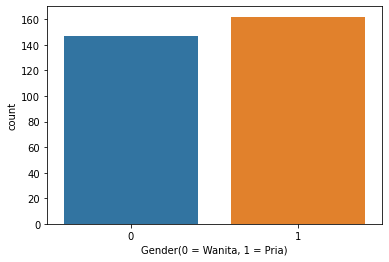

In [52]:
sns.countplot(x='GENDER',data=df_lc)
plt.xlabel('Gender(0 = Wanita, 1 = Pria)')
plt.show()

### Persentase Jumlah Pasien yang mengidap Kanker Paru-paru berdasarkan Gender

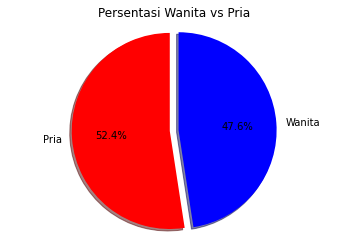

In [51]:
labels="Pria","Wanita"
explode=(0.09,0)
fig1, ax1 = plt.subplots()
ax1.pie(sex, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Persentasi Wanita vs Pria")
plt.show()

In [20]:
crosstabST=pd.crosstab(df_lc.LUNG_CANCER,df_lc.GENDER)
crosstabST

GENDER,0,1
LUNG_CANCER,,
0,22,17
1,125,145


### Frekuensi pengidap dan bukan pengidap Kanker Paru-paru berdasarkan Gender

Text(0.5, 1.0, 'Frekuensi Pengidap Kanker Paru berdasarkan Gender')

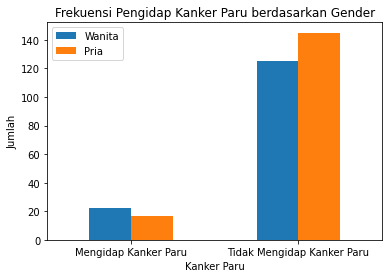

In [53]:
barplot=crosstabST.plot(kind='bar',rot=0)
barplot.set_xticklabels(labels=['Mengidap Kanker Paru', "Tidak Mengidap Kanker Paru"],rotation=0)
barplot.legend(['Wanita','Pria'])
plt.ylabel("Jumlah")
plt.xlabel("Kanker Paru")
plt.title("Frekuensi Pengidap Kanker Paru berdasarkan Gender")

### Distribusi Umur dari Pengidap Kanker Paru-paru

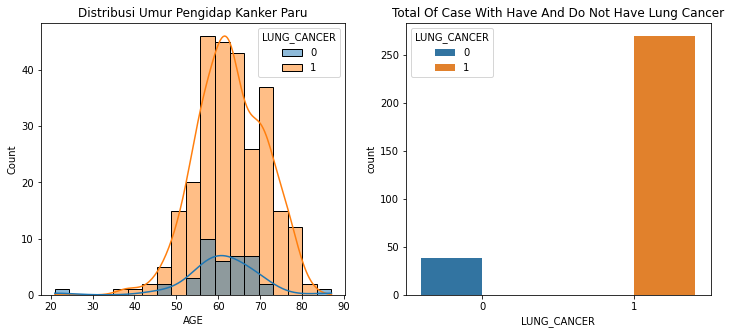

In [60]:
fig, axs = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(ax = axs[0], data=df_lc, x='AGE', kde=True, hue='LUNG_CANCER')
axs[0].set_title('Distribusi Umur Pengidap Kanker Paru')
sns.countplot(ax = axs[1], data=df_lc, x='LUNG_CANCER', hue='LUNG_CANCER')
axs[1].set_title('Total Of Case With Have And Do Not Have Lung Cancer')
plt.show();

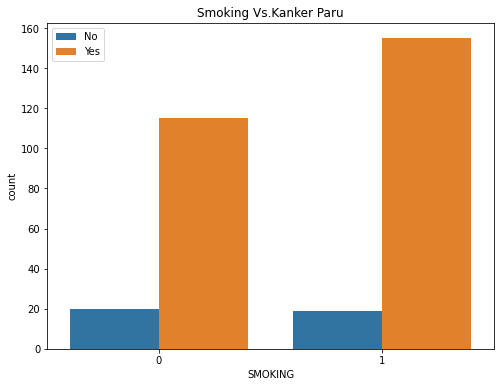

In [61]:
plt.figure(figsize=(8,6))
sns.countplot('SMOKING', data=df_lc, hue = 'LUNG_CANCER')
plt.legend(['No','Yes'])
plt.title("Smoking Vs.Kanker Paru")
plt.show()

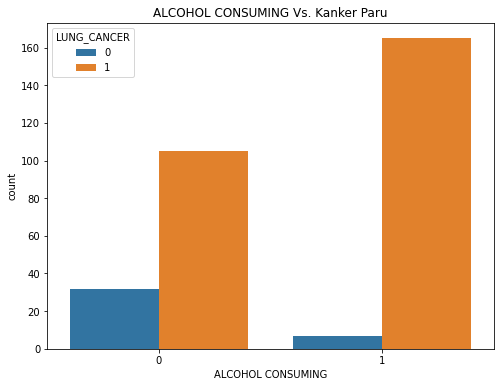

In [62]:
plt.figure(figsize=(8,6))
sns.countplot('ALCOHOL CONSUMING', data=df_lc, hue = 'LUNG_CANCER')
plt.title("ALCOHOL CONSUMING Vs. Kanker Paru")
plt.show()

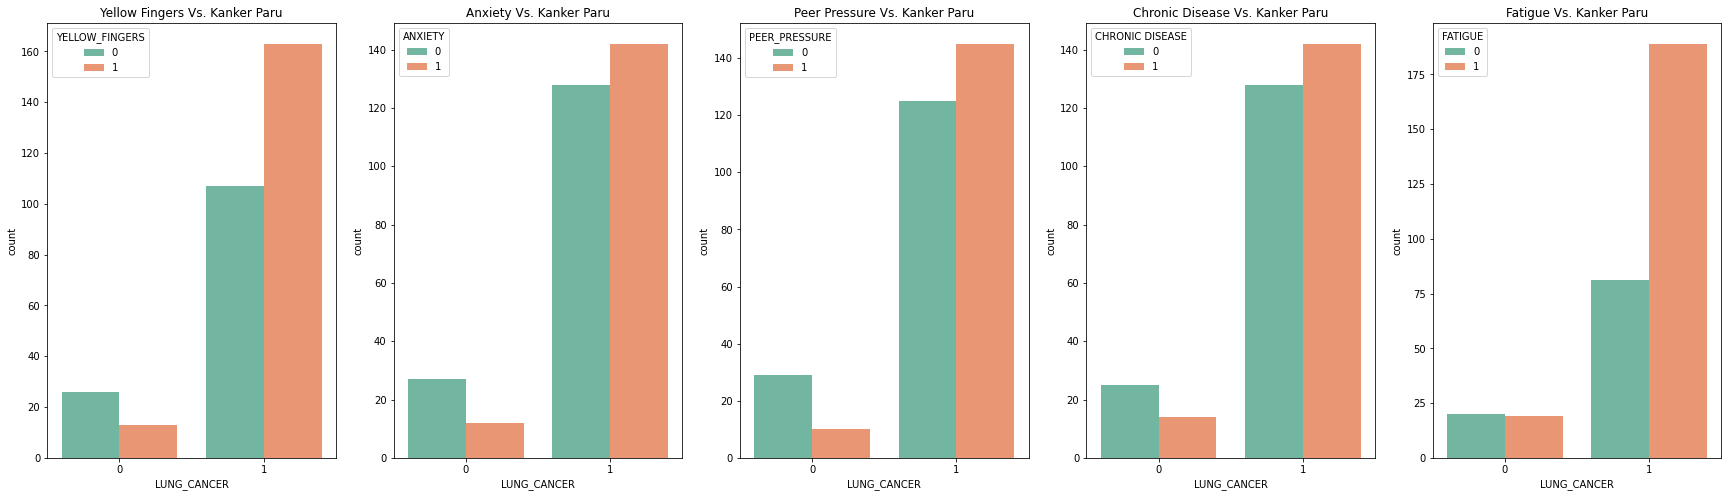

In [65]:
fig, axs = plt.subplots(1, 5, figsize=(30,8))
sns.countplot(ax=axs[0], data=df_lc, x='LUNG_CANCER', hue='YELLOW_FINGERS', palette='Set2')
axs[0].set_title('Yellow Fingers Vs. Kanker Paru')
sns.countplot(ax=axs[1], data=df_lc, x='LUNG_CANCER', hue='ANXIETY', palette='Set2')
axs[1].set_title('Anxiety Vs. Kanker Paru')
sns.countplot(ax=axs[2], data=df_lc, x='LUNG_CANCER', hue='PEER_PRESSURE', palette='Set2')
axs[2].set_title('Peer Pressure Vs. Kanker Paru')
sns.countplot(ax=axs[3], data=df_lc, x='LUNG_CANCER', hue='CHRONIC DISEASE', palette='Set2')
axs[3].set_title('Chronic Disease Vs. Kanker Paru')
sns.countplot(ax=axs[4], data=df_lc, x='LUNG_CANCER', hue='FATIGUE', palette='Set2')
axs[4].set_title('Fatigue Vs. Kanker Paru')
plt.show()

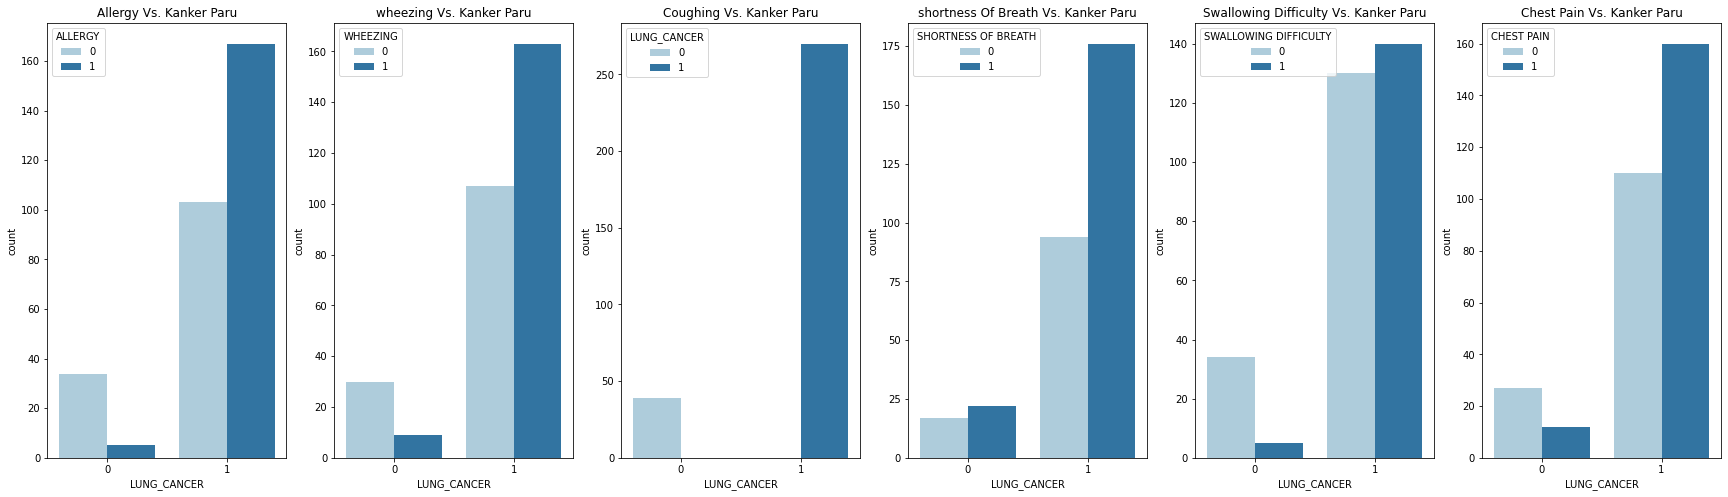

In [66]:
fig, axs = plt.subplots(1, 6, figsize=(30,8))
sns.countplot(ax=axs[0], data=df_lc, x='LUNG_CANCER', hue='ALLERGY', palette='Paired')
axs[0].set_title('Allergy Vs. Kanker Paru')
sns.countplot(ax=axs[1], data=df_lc, x='LUNG_CANCER', hue='WHEEZING', palette='Paired')
axs[1].set_title('wheezing Vs. Kanker Paru')
sns.countplot(ax=axs[2], data=df_lc, x='LUNG_CANCER', hue='LUNG_CANCER', palette='Paired')
axs[2].set_title('Coughing Vs. Kanker Paru')
sns.countplot(ax=axs[3], data=df_lc, x='LUNG_CANCER', hue='SHORTNESS OF BREATH', palette='Paired')
axs[3].set_title('shortness Of Breath Vs. Kanker Paru')
sns.countplot(ax=axs[4], data=df_lc, x='LUNG_CANCER', hue='SWALLOWING DIFFICULTY', palette='Paired')
axs[4].set_title('Swallowing Difficulty Vs. Kanker Paru')
sns.countplot(ax=axs[5], data=df_lc, x='LUNG_CANCER', hue='CHEST PAIN', palette='Paired')
axs[5].set_title('Chest Pain Vs. Kanker Paru')
plt.show()

# Data Pre-Processing

In [27]:
y = df_lc.LUNG_CANCER.values
x = df_lc.drop(['LUNG_CANCER'], axis = 1)

In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=0)

# Modeling Data

### Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression().fit(x_train, y_train)

C:\Users\indah febryana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
from sklearn.metrics import classification_report

y_train_pred = log_model.predict(x_train)

print('Classification Report Training Model (Logistic Regression) :')
print(classification_report(y_train,y_train_pred))

y_test_pred = log_model.predict(x_test)

print('\nClassification Report Testing Model (Logistic Regression):')
print(classification_report(y_test, y_test_pred))

Classification Report Training Model (Logistic Regression) :
              precision    recall  f1-score   support

           0       0.78      0.58      0.67        24
           1       0.95      0.98      0.96       192

    accuracy                           0.94       216
   macro avg       0.86      0.78      0.82       216
weighted avg       0.93      0.94      0.93       216


Classification Report Testing Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.86      0.40      0.55        15
           1       0.90      0.99      0.94        78

    accuracy                           0.89        93
   macro avg       0.88      0.69      0.74        93
weighted avg       0.89      0.89      0.88        93



In [31]:
from sklearn.metrics import confusion_matrix

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('0', '1'), ('0', '1'))

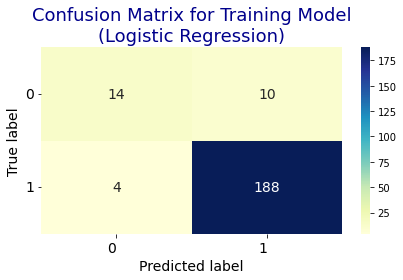

In [32]:
# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
plt.title('Confusion Matrix for Training Model\n(Logistic Regression)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [33]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('0', '1'), ('0', '1'))

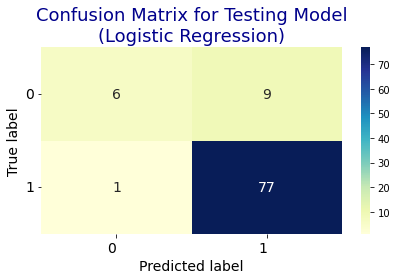

In [34]:
# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

# Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

#Train the model
rdf_model = RandomForestClassifier().fit(x_train, y_train)
print(rdf_model)

RandomForestClassifier()


In [36]:
y_train_pred = rdf_model.predict(x_train)

#~Print classification report
print('Classification Report Training Model (Random Forest Classifier) :')
print(classification_report(y_train,y_train_pred))

Classification Report Training Model (Random Forest Classifier) :
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        24
           1       0.99      1.00      1.00       192

    accuracy                           1.00       216
   macro avg       1.00      0.98      0.99       216
weighted avg       1.00      1.00      1.00       216



In [37]:
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('0', '1'), ('0', '1'))

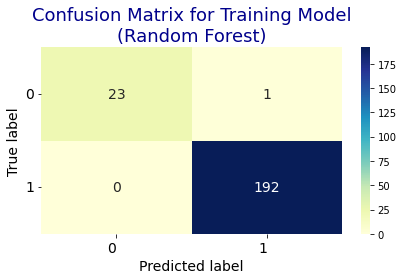

In [38]:
# Plot confusion matrix

plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
plt.title('Confusion Matrix for Training Model\n(Random Forest)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [39]:
y_test_pred = rdf_model.predict(x_test)

#~Print classification report
print('Classification Report Testing Model (Random Forest Classifier) :')
print(classification_report(y_test,y_test_pred))

Classification Report Testing Model (Random Forest Classifier) :
              precision    recall  f1-score   support

           0       0.71      0.33      0.45        15
           1       0.88      0.97      0.93        78

    accuracy                           0.87        93
   macro avg       0.80      0.65      0.69        93
weighted avg       0.86      0.87      0.85        93



In [40]:
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('0', '1'), ('0', '1'))

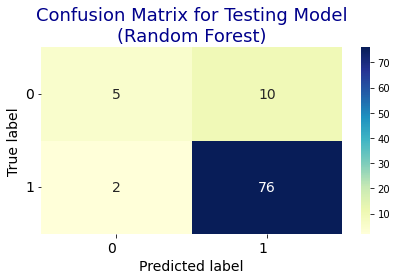

In [41]:
# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
plt.title('Confusion Matrix for Testing Model\n(Random Forest)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

# Gradient Boosting

In [42]:
from sklearn.ensemble import GradientBoostingClassifier

gbt_model = GradientBoostingClassifier().fit(x_train, y_train)
print(gbt_model)

GradientBoostingClassifier()


In [43]:
y_train_pred = gbt_model.predict(x_train)

#~Print classification report
print('Classification Report Training Model (Gradient Boosting Classifier) :')
print(classification_report(y_train,y_train_pred))

Classification Report Training Model (Gradient Boosting Classifier) :
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        24
           1       1.00      0.99      0.99       192

    accuracy                           0.99       216
   macro avg       0.96      0.99      0.98       216
weighted avg       0.99      0.99      0.99       216



In [44]:
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('0', '1'), ('0', '1'))

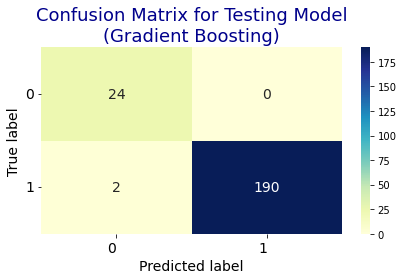

In [45]:
# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
plt.title('Confusion Matrix for Testing Model\n(Gradient Boosting)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [46]:
y_test_pred = gbt_model.predict(x_test)

#~Print classification report
print('Classification Report Training Model (Gradient Boosting Classifier) :')
print(classification_report(y_test,y_test_pred))

Classification Report Training Model (Gradient Boosting Classifier) :
              precision    recall  f1-score   support

           0       0.62      0.33      0.43        15
           1       0.88      0.96      0.92        78

    accuracy                           0.86        93
   macro avg       0.75      0.65      0.68        93
weighted avg       0.84      0.86      0.84        93



In [47]:
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('0', '1'), ('0', '1'))

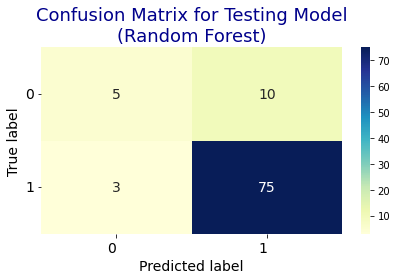

In [48]:
# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
plt.title('Confusion Matrix for Testing Model\n(Random Forest)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()